# converting collection of image data to collection of numpy arrays

In [596]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  


#create empty np.array of 2 d with 0 rows and 10202 cols
arr = np.empty((0,10202), int)
ind1=['01','02','04','06','07','09','10','12','13']
ind2=['02','03','04','05','06','07','09','10','11','12','13']
list1=[1,2]
#first 15 rows contain happy emoticons with last index as 'happy'
for x in ind1:

    name= 'subject'+ x +'.happy.gif'  
 
    img = Image.open(name) 
    numpydata = np.asarray(img)
    vecData= numpydata.flatten()
    vecData = np.append(vecData,1)
    arr = np.append(arr, [vecData.T], axis=0)
  

#next 15 rows contain sad emoticons with last index as 'sad'    
    
for x in ind2:
 
    name= 'subject'+ x +'.sad.gif'  
   
    img = Image.open(name) 
    numpydata = np.asarray(img)
    vecData= numpydata.flatten()
   # vecData = np.append(vecData,'sad')
    vecData = np.append(vecData,2)
    arr = np.append(arr, [vecData.T], axis=0)
    
    
    
train_data=arr # to make it DxN dimention    
    
   
print(train_data.shape)


  
#  shape
#print(final.shape)

(20, 10202)


# seperating Feature data points and their classification into train_X and train_Y
# select value of K

In [597]:

D=10201
N=20
k=12
train_X=train_data[:,0:10201]
train_Y=train_data[:,10201:10202]
print(train_X.shape)
print(train_Y.shape)


(20, 10201)
(20, 1)


# now we have our data as train_X we can apply higher dimentional PCA on it


In [598]:



from sklearn.preprocessing import StandardScaler

#standard_data=StandardScaler(with_std=False).fit_transform(train_X);
standard_data=StandardScaler().fit_transform(train_X);
X=standard_data
Sx=np.matmul(X,X.T)
Sx=Sx*(1/N)
print(Sx.shape)



(20, 20)


# finding eigen vectors and eigen values of NxN i.e 20x20 covariance matrix
# one can also see how much variance is explained by how many Principal components

In [599]:

from scipy.linalg import eigh

values,vectors=eigh(Sx)

total_var=values.sum()
cum_sum=np.empty((20,),float)
local_var=0.0
for i in range(20):
  local_var= local_var + values[19 - i]
  cum_sum[i]=local_var/total_var*100
  print("varience explained (in %) on ",i+1," PC ",(local_var/total_var)*100)  


#print(values)

#vectors=vectors.T
vec=vectors[:,N-k: N]


print(vec.shape)

val=values[N-k:N]

#print(vec)







varience explained (in %) on  1  PC  28.600188932919053
varience explained (in %) on  2  PC  42.576484077158746
varience explained (in %) on  3  PC  51.657942839669644
varience explained (in %) on  4  PC  58.45664568601832
varience explained (in %) on  5  PC  64.76936914467066
varience explained (in %) on  6  PC  70.40155537425275
varience explained (in %) on  7  PC  75.07612431100017
varience explained (in %) on  8  PC  79.11120716533874
varience explained (in %) on  9  PC  82.30052720189941
varience explained (in %) on  10  PC  85.30494355185765
varience explained (in %) on  11  PC  88.11401446769511
varience explained (in %) on  12  PC  90.48591370151784
varience explained (in %) on  13  PC  92.41545182250256
varience explained (in %) on  14  PC  94.21095685442543
varience explained (in %) on  15  PC  95.64800366594446
varience explained (in %) on  16  PC  97.05107187331544
varience explained (in %) on  17  PC  98.24538373869892
varience explained (in %) on  18  PC  99.2492485964125

# graph to see covariance explained by Principal components

Num of components explained 90% variance: 12
Num of components explained 95% variance: 15
Num of components explained 99% variance: 18


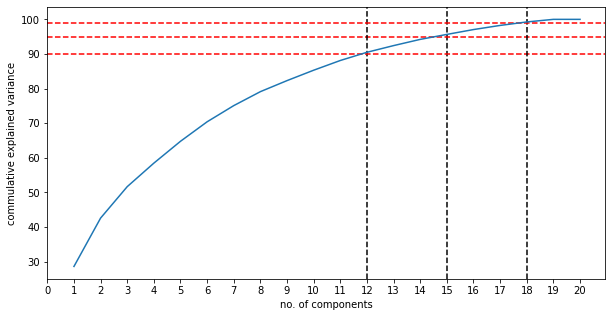

(20, 10201)
(20, 12)


In [600]:

k95=np.argmax(cum_sum>95)+1
k90=np.argmax(cum_sum>90)+1
k99=np.argmax(cum_sum>99)+1
print("Num of components explained 90% variance: "+str(k90))
print("Num of components explained 95% variance: "+str(k95))
print("Num of components explained 99% variance: "+str(k99))

fig=plt.figure(figsize=[10,5])
ax=fig.add_subplot(1,1,1)
plt.xlabel("no. of components")
plt.ylabel("commulative explained variance")
plt.axvline(x=k95, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.axvline(x=k90, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
plt.axvline(x=k99, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
plt.grid()
xt=1+np.array(range(20))
plt.plot(xt,cum_sum)
major_ticks = np.arange(0, 21,1)
ax.set_xticks(major_ticks)



ax.grid(which='both')
plt.show()

print(X.shape)
print(vec.shape)



# we are calculating U= eigen vector of DxD covariance matrix i.e actual sample data covariance matrix

In [601]:

U=np.matmul(X.T,vec)
print(" U ",U.shape, " = X.T ",X.T.shape," eigenVec ", vec.shape)
U=U.T


 U  (10201, 12)  = X.T  (10201, 20)  eigenVec  (20, 12)


In [602]:
#converting into unit vectors

import math
for i in range(k):
    U[i]=U[i]*(1/math.sqrt(N*val[i]))




# finally projecting sample data points into k dimentions

In [603]:
coordinates=np.matmul(U, X.T)
print('resultant new data point shape \n', U.shape,'x', X.T.shape,'=',coordinates.shape)
X_pca=coordinates
print(X_pca.shape)

resultant new data point shape 
 (12, 10201) x (10201, 20) = (12, 20)
(12, 20)


# now we have our data after applying PCA in K dimention
# now its time to apply LDA with 2 classes
# first find Sb=(M2-M1)X(M2-M1).T
# then find Sw=S1+S2
# then find non zero eigen value and corresponding eigenvec of Sw^(-1).Sb


In [604]:

happy=X_pca[:,0:9].T
sad=X_pca[:,9:20].T
print(happy.shape)
print(sad.shape)
print(X_pca.shape)

(9, 12)
(11, 12)
(12, 20)


# finding mean of happy and sad class

In [605]:
#finding mean of happy class and sad class
m1=happy.mean(axis=0) #mean along each feature/coulumn
print(m1.shape)
M1 = np.reshape(m1, (k, 1))
print(M1.shape)
m2=sad.mean(axis=0)
M2=np.reshape(m2,(k,1))
print(M2.shape)

(12,)
(12, 1)
(12, 1)


# calculating Sb and Sw and then finding final=Sw^(-1)Sb

In [606]:
Sb=np.matmul((M1-M2),(M1-M2).T)
v = np.cov(Sb)
v1, v2 = np.linalg.eigh(Sb)


#center happy class data to find covariance matrix
happy1=StandardScaler(with_std=False).fit_transform(happy);
#center sad class data to find covariance matrix
sad1=StandardScaler(with_std=False).fit_transform(sad);

Sw1=np.matmul(happy1.T,happy1)*(1/9)
Sw2=np.matmul(sad1.T,sad1)*(1/11)
Sw=Sw1+Sw2
Sw_in=np.linalg.inv(Sw)

final=np.matmul(Sw_in,Sb)


# finding eigen valyes and eig vect for non symmetric matrix final

In [607]:

values,vectors=np.linalg.eig(final)

#sort according to eigeenValues in ascending order
idx=np.argsort(abs(values))[::-1]
eigVal=values[idx]
eigVec=vectors[:,idx]
eigVec=eigVec.T



# since we have 2 classes only 1 non zero eigen value will be found
# we'll use eigen vector corresponding to that eigen value to project into 1 dim LDA

In [608]:
#we'll use that one non zero eigen values vector to convert into LDA classification for 2 class

vec=eigVec[0:1,:]
print(X_pca.shape)
Y=np.matmul(vec,X_pca)
Y=Y.T




(12, 20)


# to check if two classes are seperated or not
# in case they are seperated we'll calculate the distance of seperation

In [609]:

flag=True
#here we are calculating min and max point of happy and sad class
minHappy=np.min(Y[0:9]) 
maxHappy=np.max(Y[0:9])
avgHappy=np.mean(Y[0:9])
minSad=np.min(Y[9:20])
maxSad=np.max(Y[9:20])
avgSad=np.mean(Y[9:20])


if not(maxHappy<minSad or maxSad<minHappy):
    print("not separated")

elif(maxHappy<minSad):
    flag=True
   
    separate=(minSad-maxHappy)
    mSeparate=(avgSad-avgHappy)
   
    
    sep=maxHappy+separate/2.0
    msep=avgHappy+mSeparate/2.0
    print("max happy seperated by ",separate," from min sad ")
    print("and the separation point is ", sep)
    print("mean happy seperated by ",mSeparate," from mean sad ")
    print("and the separation point is ", msep)
else:
    flag=False
    separate=(minHappy-maxSad)
    mSeparate=avgHappy-avgSad
   
    sep=maxSad+separate/2.0
    msep=avgSad+mSeparate/2.0
    print("max sad seperated by ",separate," from min happy ")
    print("and the separation point is ", sep)
    print("mean sad seperated by ",mSeparate," from mean happy ")
    print("and the separation point is ", msep)




max happy seperated by  (3.1316921174974492+0j)  from min sad 
and the separation point is  (-2.724453722445702+0j)
mean happy seperated by  (38.90070671441004+0j)  from mean sad 
and the separation point is  (-1.945035335720501+0j)


# plot of 1 Dim LDA projection

(20, 1)
(20, 1)


/home/sneha/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/sneha/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


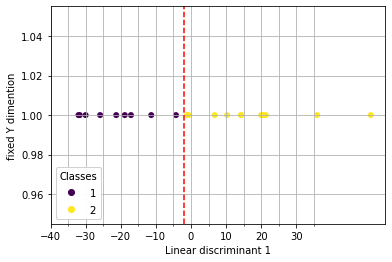

In [610]:

x1=Y
x2=np.full((20,1),1)
print(x1.shape)
print(x2.shape)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

scatter=ax.scatter(x1,x2,c=train_Y, edgecolor='none', alpha=1, cmap=plt.cm.get_cmap('viridis',2))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.xlabel('Linear discriminant 1', axes=ax)
plt.ylabel('fixed Y dimention', axes=ax)
#plt.axvline(x=sep, color="k", linestyle="--")
plt.axvline(x=msep, color="r", linestyle="--")

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-40, +40, 10)
minor_ticks = np.arange(-40, +40, 5)


ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')
plt.show()



# now we'll test the accuracy of LDA perform on different k which give separation

# first collect the test data in the form matrix of (10x10202) dimention, where last column denotes the label

In [611]:

arr2= np.empty((0,10202), int)
ind1=['03','05','08','11','14','15']
ind2=['01','08','14','15']

#first 15 rows contain happy emoticons with last index as 'happy'
for x in ind1:

    name= 'subject'+ x +'.happy.gif'  
 
    img = Image.open(name) 
    numpydata = np.asarray(img)
    vecData= numpydata.flatten()
    #vecData = np.append(vecData,'happy')
    vecData = np.append(vecData,1)
    arr2 = np.append(arr2, [vecData.T], axis=0)
  

#next 15 rows contain sad emoticons with last index as 'sad'    
    
for x in ind2:
 
    name= 'subject'+ x +'.sad.gif'  
   
    img = Image.open(name) 
    numpydata = np.asarray(img)
    vecData= numpydata.flatten()
   # vecData = np.append(vecData,'sad')
    vecData = np.append(vecData,2)
    arr2 = np.append(arr2, [vecData.T], axis=0)
    
    
    
test_data=arr2 # to make it DxN dimention    
    
   
print(test_data.shape)



(10, 10202)


# seperate test data into test_X (feature data) and test_Y( label od data)

In [612]:
test_X=test_data[:,0:10201]
test_Y=test_data[:,10201:10202]
print(test_X.shape)
print(test_Y.shape)

(10, 10201)
(10, 1)


# standardise the data in the same way we did for train data

In [613]:

from sklearn.preprocessing import StandardScaler

#standard_data=StandardScaler(with_std=False).fit_transform(train_X);
standard_data=StandardScaler().fit_transform(test_X);
X=standard_data
print(X.shape)

(10, 10201)


# project the test data into k dimention by multipying with the projection matrix calculated for train data

In [614]:
#converting to corresponding PCA for k dim
coordinates=np.matmul(U, X.T)
print('resultant new data point shape \n', U.shape,'x', X.T.shape,'=',coordinates.shape)
X_pca=coordinates

resultant new data point shape 
 (12, 10201) x (10201, 10) = (12, 10)


# converting into 1 Dim LDA by multipyling with the projection vector calculated for train data

In [615]:
#converting into 1 dim LDA
Y=np.matmul(vec,X_pca)


# calculating accuracy of test data by checking its value in 1 dim with respect to the threshold calculated using train data

In [616]:
c=0
p=0
if(flag):
    for i in range(10):
        if(Y[0][i]<sep and test_Y[i][0]==1 ):
            c+=1
            
        elif (Y[0][i]>=sep and test_Y[i][0]==2):
            c+=1
             
        if(Y[0][i]<msep and test_Y[i][0]==1 ):
            p+=1
            
        elif (Y[0][i]>=sep and test_Y[i][0]==2):
            p+=1
                 
            
       
         
else:
     for i in range(10):
        if(Y[0][i]>sep and test_Y[i][0]==1 ):
            c+=1
        elif(Y[0][i]<=sep and test_Y[i][0]==2):
            c+=1
        if(Y[0][i]>msep and test_Y[i][0]==1 ):
            p+=1
        elif(Y[0][i]<=msep and test_Y[i][0]==2):
            p+=1
           

print("with separation on min max for k= ",k," accuracy ", (c/10)*100)

print("with separation on mean for k= ",k," accuracy ", (p/10)*100)

    
            
        
            
    

with separation on min max for k=  12  accuracy  90.0
with separation on mean for k=  12  accuracy  100.0


# plotting test Data fo better visulaisation

/home/sneha/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/sneha/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


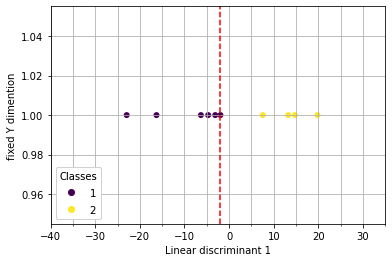

In [617]:
x1=Y
x2=np.full((10,1),1)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

scatter=ax.scatter(x1,x2,c=test_Y, edgecolor='none', alpha=1, cmap=plt.cm.get_cmap('viridis',2))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.xlabel('Linear discriminant 1', axes=ax)
plt.ylabel('fixed Y dimention', axes=ax)

#plt.axvline(x=sep, color="k", linestyle="--")
plt.axvline(x=msep, color="r", linestyle="--")

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(-40, +40, 10)
minor_ticks = np.arange(-40, +40, 5)


ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.grid(which='both')
plt.show()



# observation

# k=10: not seperated
# k=12:
1.max happy seperated by  (3.13169211)  from min sad 
and the separation point is  (-2.7244537)
   
2.mean happy seperated by  (38.90070671)  from mean sad 
and the separation point is  (-1.9450353)
   
3.when separation on min max, for k=  12  accuracy  90.0
   
4.when separation on mean, for k=  12  accuracy  100.0

# k=13
1.max happy seperated by  (13.57693935)  from min sad 
and the separation point is  (-1.218097563750)

2.mean happy seperated by  (37.4861193)  from mean sad 
and the separation point is  (-1.8743059)

3.when separation on min max, for k=  13  accuracy  70.0

4.when separation on mean, for k=  13  accuracy  70.0

# k=14
1.max happy seperated by  (13.58483421)  from min sad 
and the separation point is  (-1.75111634)

2.mean happy seperated by  (37.481861604)  from mean sad 
and the separation point is  (-1.874093080)

3.when separation on min max, for k=  14  accuracy  70.0

4.when separation on mean, for k=  14  accuracy  70.0

# k=15
1.max happy seperated by  (10.162460418943967+0j)  from min sad 
and the separation point is  (-1.4412398755248486+0j)

2.mean happy seperated by  (36.849954585129005+0j)  from mean sad 
and the separation point is  (-1.842497729256447+0j)

3.when separation on min max, for k=  15  accuracy  80.0

4.when separation on mean, for k=  15  accuracy  80.0

# k=16
1.max sad seperated by  (11.5980511)  from min happy 
and the separation point is  (2.584391)

2.mean sad seperated by  (36.54763694)  from mean happy 
and the separation point is  (1.82738184)

3.when separation on min max, for k=  16  accuracy  80.0

4.when separation on mean, for k=  16  accuracy  80.0

# k=17
1.max sad seperated by  (15.42576171)  from min happy 
and the separation point is  (2.437124)

2.mean sad seperated by  (35.9817538147)  from mean happy 
and the separation point is  (1.799087690)

3.when separation on min max, for k=  17  accuracy  70.0

4.when separation on mean, for k=  17  accuracy  80.0

# k=18
1.max happy seperated by  (22.8543761)  from min sad 
and the separation point is  (-4.31111225)

2.mean happy seperated by  (35.58907249216)  from mean sad 
and the separation point is  (-1.779453624)

3.when separation on min max for k=  18  accuracy  70.0

4.when separation on mean for k=  18  accuracy  70.0

# k=19
1.max happy seperated by  (34.644215640)  from min sad 
and the separation point is  (-1.73221078)

2.mean happy seperated by  (34.644215640)  from mean sad 
and the separation point is  (-1.732210782)

3.when separation on min max, for k=  19  accuracy  80.0

4.when separation on mean, for k=  19  accuracy  80.0



# Conclusion

we get 90% variance explained on K=12
and max accuracy of 90% on test Data when center between the distance of max_left and min_right of 
2 classes (left and right) i.e (3.13169211)
is choosesn as threshold i.e (-2.7244537).

and max accuracy of 100% on test data when center between the distance of mean of 2 classes (38.90070671)
is choosen as threshold i.e (-1.9450353)

we get max distance between 2 classes i.e between min_right and max_left of 2 classes at k=19
which is (34.644215640) 
but the accuracy here is only 80% in both cases when the threshold is choosen as center between
the distance of max_left and min_right as well as when center is choosen as center of distance between mean 
of 2 classes.

So k=12 would be the best choice for k according to me which give max accuracy
and k=19 would give maximum seperation between 2 classes in train data